### Hierarchical Clustering

One issue with K-means clustering is that it requires a predetermined number of clusters. What if you don't know how many clusters are in your data? Hierarchical Clustering allows the researcher to build a hierarchical tree linking the data points, and then determine the number and composition of clusters using a distance metric.

For this analysis, I'm going to build a Hierarchical Cluster using the WorldNewsAPI title TFIDF dataset, to see if I can cluster the articles based on topic.

In [110]:
library(ggplot2)
library(lsa)
library(tidyverse)
worldnews_title <- read.csv('../data/wdms/tfidf/worldnewsapi/lemmed/title.csv',row.names=1)
worldnews_text <- read.csv('../data/wdms/tfidf/worldnewsapi/lemmed/text.csv',row.names=1)
wdm1 <- apply(as.matrix(worldnews_title[,6:ncol(worldnews_title)]),1,replace_na,0)
wdm2 <- apply(as.matrix(worldnews_text[,6:ncol(worldnews_text)]),1,replace_na,0)
head(wdm1)
head(wdm2)

,0,1,2,3,4,5,6,7,8,9,...,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100
trans,0,0.1447582,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
woman,0,0.0000000,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
school,0,0.0000000,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ban,0,0.0000000,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
say,0,0.0000000,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gender,0,0.0000000,0,0.1308339,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100
transgender,0.03649197,0.13336512,0.19168009,0.101382067,0.041999961,0.052954688,0.09676675,0.104886630,0.11774624,0.11875345,...,0.009997519,0.009970927,0.008998661,0.01029031,0.008620645,0.01022218,0.01035156,0.01870603,0.01594083,0.01604575
school,0.00000000,0.00000000,0.00000000,0.074510823,0.000000000,0.003723740,0.00000000,0.029871020,0.07890200,0.07957694,...,0.000000000,0.000000000,0.017085063,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.03046482
woman,0.00000000,0.03250359,0.00000000,0.000000000,0.001852261,0.003027346,0.04356466,0.016189802,0.06414618,0.06469489,...,0.000000000,0.000000000,0.069449534,0.00000000,0.000000000,0.00000000,0.00000000,0.01443687,0.00000000,0.02476745
people,0.00000000,0.04176498,0.14784441,0.008648495,0.055534134,0.033712823,0.07996819,0.034671390,0.07326545,0.07389217,...,0.079314871,0.079103903,0.053542857,0.08163773,0.056992915,0.04054859,0.00000000,0.04946781,0.00000000,0.07425729
gender,0.00000000,0.07743292,0.01566319,0.057723997,0.000000000,0.014424021,0.01779147,0.030855020,0.08150116,0.08219833,...,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
state,0.00000000,0.00000000,0.00000000,0.109189951,0.000000000,0.130964584,0.00000000,0.009215518,0.06085521,0.06137577,...,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.03287087,0.00000000,0.00000000


In [92]:
#Cosine produces a similarity matrix, must first convert to distance matrix
cosdist <- function(wdm){as.dist(apply(10**(1-cosine(wdm)),1,replace_na,10))}
dist1 <- cosdist(wdm1)
dist2 <- cosdist(wdm2)

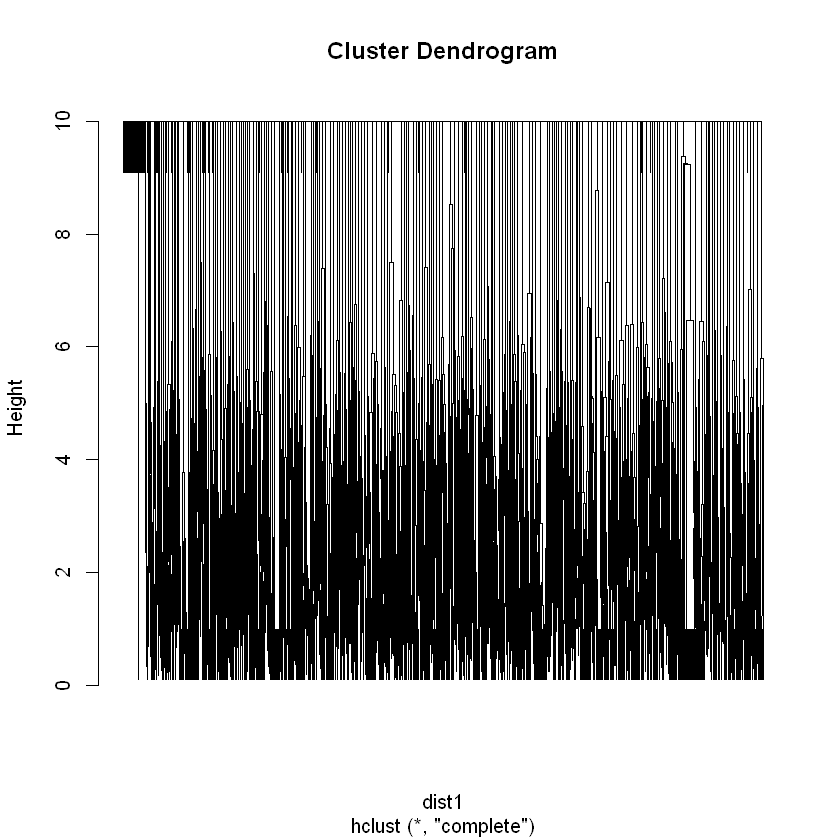

In [103]:
clust1 <- hclust(dist1)
plot(clust1,labels=FALSE)

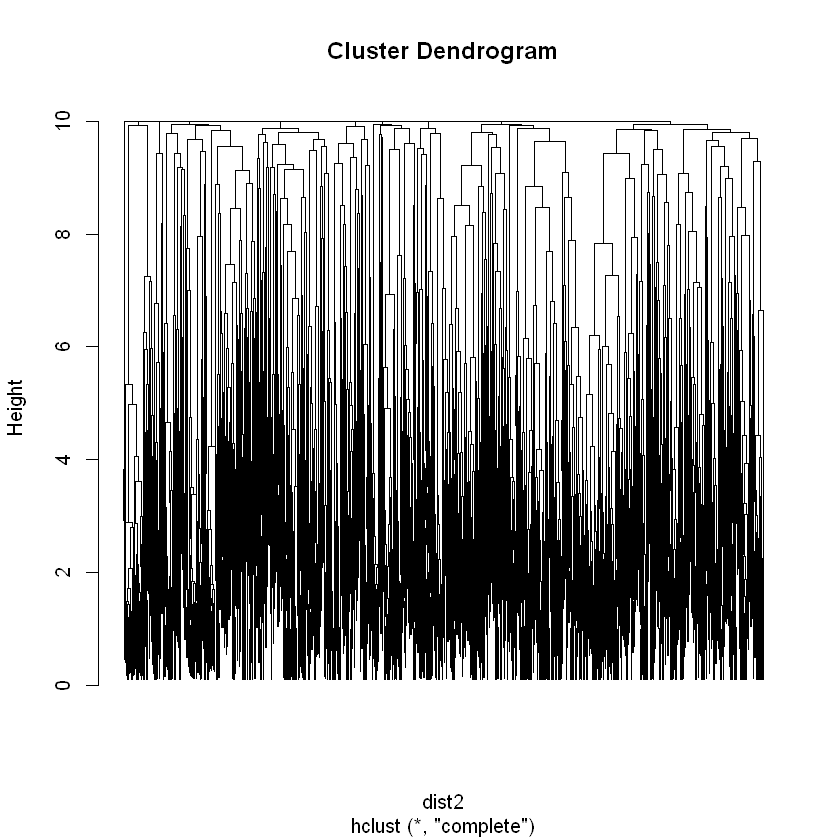

In [104]:
clust2 <- hclust(dist2)
plot(clust2,labels=FALSE)

In [111]:
labels <- cutree(clust2,k=10)
worldnews_text$hclust <- labels
head(worldnews_text)

,authors,country,sentiment,url,said,transgender,school,woman,people,gender,...,known,vote,clear,making,cent,role,got,today,study,hclust
0,DASHA LITVINOVA,us,0.311,https://apnews.com/article/russia-lgbtq-crackdown-extremist-supreme-court-1b8f4cd8708d1c6cf3486c5f27fd7354,0.00000000,0.03649197,0.00000000,0.000000000,0.000000000,0.00000000,...,0.000000000,0,0.000000000,0.000000000,0.0000000,0.00230223,0,0.002179315,0.000000000,1
1,Daniel Yo-Ling,us,0.134,https://thediplomat.com/2023/11/where-do-trans-rights-stand-in-taiwan-after-same-sex-marriage-legalization/,0.00000000,0.13336512,0.00000000,0.032503591,0.041764981,0.07743292,...,0.009177168,0,0.000000000,0.008925794,0.0000000,0.01018516,0,0.000000000,0.000000000,2
2,Deneen Broadnax,us,0.120,https://worldnewsera.com/news/science/transgender-peoples-neurological-needs-are-being-overlooked/,0.00000000,0.19168009,0.00000000,0.000000000,0.147844409,0.01566319,...,0.000000000,0,0.000000000,0.000000000,0.0000000,0.00000000,0,0.000000000,0.103837812,2
3,Deeksha Teri,in,0.060,https://indianexpress.com/article/education/class-10th-12th-board-exams-forms-transgender-students-await-inclusion-of-third-gender-category-maharashtra-registers-highest-ahead-of-cbse-8914625/,0.01884960,0.10138207,0.07451082,0.000000000,0.008648495,0.05772400,...,0.000000000,0,0.000000000,0.008317401,0.1577072,0.00000000,0,0.000000000,0.000000000,3
4,Lois Kirkup,ca,0.481,https://ottawacitizen.com/news/local-news/photos-protesters-clash-in-downtown-ottawa,0.00000000,0.04199996,0.00000000,0.001852261,0.055534134,0.00000000,...,0.000000000,0,0.000000000,0.000000000,0.0000000,0.00000000,0,0.000000000,0.000000000,4
5,Lil Kalish,us,0.244,https://www.huffpost.com/entry/matt-walsh-anti-trans-push-tennessee_n_653fd5e8e4b032ae1c9c0497,0.08365176,0.05295469,0.00372374,0.003027346,0.033712823,0.01442402,...,0.000000000,0,0.005181008,0.004988028,0.0000000,0.00000000,0,0.005387921,0.006374857,2


In [155]:
total <- apply(wdm2,1,sum)
for(l in 1:10){
    # Create a df by summing the tfidf scores within each document cluster, and dividing by the tfidf scores across the whole corpus.
    # This gives a metric showing which terms appear disproportionately often in each group compared to the corpus overall.
    wdm_l <- as.data.frame(cbind(rownames(wdm2),apply(wdm2[,worldnews_text$hclust==l],1,sum)/total),row.names=rownames(wdm2))
    colnames(wdm_l) <- c('term','tfidf')
    wdm_l <- wdm_l %>%
        arrange(desc(tfidf))
    print(wdm_l[1:10,])
    }
head(wdm_l)

         term             tfidf
1  california 0.841243629722812
2    district 0.830429913839144
3     teacher 0.816309495586663
4    parental 0.809180012573928
5     student  0.80660062555506
6       board 0.779532160930494
7      school 0.766789782362476
8    guidance 0.756478880323508
9    bathroom 0.724562161189888
10     parent 0.659004933963349
              term             tfidf
1           gaines 0.851923693300024
2            minor 0.705328390997731
3             veto 0.702620571462121
4  genderaffirming 0.678370114591811
5           clinic 0.642816496121809
6          athlete 0.638735399562439
7             ohio 0.633528655347302
8             care 0.624239772166375
9          compete 0.619296410896178
10       treatment 0.615144325593526
       term             tfidf
1     light  0.56363252820626
2  category 0.487812817490927
3   company 0.477043382089449
4      cent 0.416857119519885
5  minister 0.241668205008133
6     world 0.208530404487944
7     event 0.198893319710604
8

term,tfidf
national,0.0210607808174739
rights,0.00928869117932643
known,0.00896377900127312
role,0.00760698925264935
international,0.00675205580223391
study,0.00547714208156932


transgender      school       woman      people      gender       state 
  113.72536   105.31805    98.37197    95.64336    83.49756    81.26064